# Actividad Evaluable 2 - Manejo de datos con Pandas


---


Elizabeth Jauregui Zarate
A01253381

# Visualizing Data in Python
When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using tables, histograms, boxplots, scatter plots and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

In this notebook will use the Seaborn data processing library, which is a higher-level interface to Matplotlib that can be used to simplify many visualization tasks

The Seaborn provides visualisations tools that will allow to explore data from a graphical perspective.

# Importing libraries

In [5]:
# Import the packages that we will be using
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing data

In [6]:
# url string that hosts our .csv file
url = "cartwheel.csv"

# Read the .csv file and store it as a pandas Data Frame
df = pd.read_csv(url)

# Exploring the content of the data set
Get a general 'feel' of the data

In [7]:
# Print the number of rows
num_rows = len(df.index)
print(f"Number of rows: {num_rows}")

Number of rows: 52


In [8]:
# Print the number of columns
num_columns = len(df.columns)
print(f"Number of columns: {num_columns}")

Number of columns: 12


In [9]:
#The columns in a Pandas data frame have names, to see the names, use the columns method:

#To gather more information regarding the data, we can view the column names with the following function:
df.columns

Index(['ID', 'Age', 'Gender', 'GenderGroup', 'Glasses', 'GlassesGroup',
       'Height', 'Wingspan', 'CWDistance', 'Complete', 'CompleteGroup',
       'Score'],
      dtype='object')

In [10]:
#Be aware that every variable in a Pandas data frame has a data type. There are many different data types, but most commonly you will encounter floating point values (real numbers), integers, strings (text), and date/time values. When Pandas reads a text/csv file, it guesses the data types based on what it sees in the first few rows of the data file. Usually it selects an appropriate type, but occasionally it does not. To confirm that the data types are consistent with what the variables represent, inspect the dtypes attribute of the data frame.
df.dtypes

,0
ID,int64
Age,float64
Gender,object
GenderGroup,int64
Glasses,object
GlassesGroup,int64
Height,float64
Wingspan,float64
CWDistance,int64
Complete,object


In [11]:
#Summary statistics, which include things like the mean, min, and max of the data, can be useful to get a feel for how large some of the variables are and what variables may be the most important.
#Summary statistics for the quantitative variables:
df.describe()

,ID,Age,GenderGroup,GlassesGroup,Height,Wingspan,CWDistance,CompleteGroup,Score
count,52.000000,51.000000,52.000000,52.000000,51.000000,51.000000,52.000000,51.000000,52.000000
mean,26.500000,28.411765,1.500000,0.500000,68.971569,67.313725,85.576923,0.843137,7.173077
std,15.154757,5.755611,0.504878,0.504878,5.303812,5.624021,14.353173,0.367290,2.211566
min,1.000000,22.000000,1.000000,0.000000,61.500000,57.500000,63.000000,0.000000,2.000000
25%,13.750000,25.000000,1.000000,0.000000,64.500000,63.000000,72.000000,1.000000,6.000000
50%,26.500000,27.000000,1.500000,0.500000,69.000000,66.000000,85.000000,1.000000,8.000000
75%,39.250000,30.000000,2.000000,1.000000,73.000000,72.000000,96.500000,1.000000,9.000000
max,52.000000,56.000000,2.000000,1.000000,79.500000,76.000000,115.000000,1.000000,10.000000


# Frequency tables
The value_counts() method can be used to determine the number of times that each distinct value of a variable occurs in a data set. In statistical terms, this is the "frequency distribution" of the variable. The value_counts() method produces a table with two columns. The first column contains all distinct observed values for the variable. The second column contains the number of times each of these values occurs. Note that the table returned by value_counts() is actually a Pandas data frame, so can be further processed using any Pandas methods for working with data frames.

In [14]:
# Number of times that each distinct value of a variable occurs in a data set:
column = df['Age']
frequency_distribution = column.value_counts()
print(frequency_distribution)


Age
26.0    7
27.0    7
24.0    5
28.0    5
23.0    5
25.0    4
30.0    4
33.0    3
39.0    2
38.0    2
29.0    2
31.0    2
56.0    1
22.0    1
32.0    1
Name: count, dtype: int64


Note that the value_counts() method excludes missing values. We confirm this below by adding up observations to your data frame with some missing values and then computing value_counts() and comparing this to the total number of rows in the data set, which is 28. This tells us that there are 28 - (21+6) = 1 missing values for this variable (other variables may have different numbers of missing values).

In [17]:
# Total number of observations:
total_observations = len(df)
print(f"Total number of observations: {total_observations}")


# total number of null observations in Age:
null_observations_age = df['Age'].isnull().sum()
print(f"Total number of null observations in Age: {null_observations_age}")


# Total number of counts in Age (excluding missing values):
counts_age_excluding_missing = df['Age'].count()
print(f"Total number of counts in Age (excluding missing values): {counts_age_excluding_missing}")

Total number of observations: 52
Total number of null observations in Age: 1
Total number of counts in Age (excluding missing values): 51


# Histogram
It is often good to get a feel for the shape of the distribution of the data.

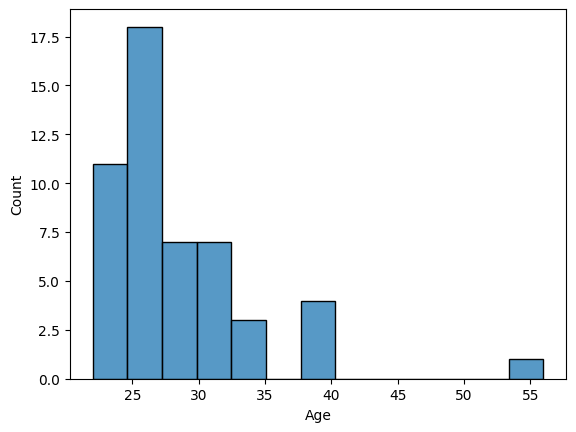

In [18]:
# Plot histogram of Age:
sns.histplot(df['Age'])
plt.show()

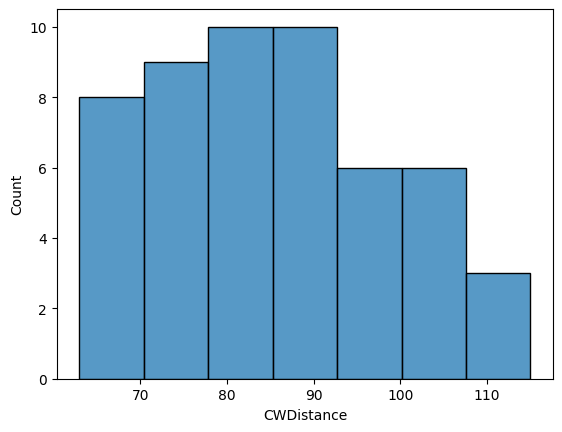

In [19]:
# Plot distribution of CWDistance:
sns.histplot(df['CWDistance'])
plt.show()

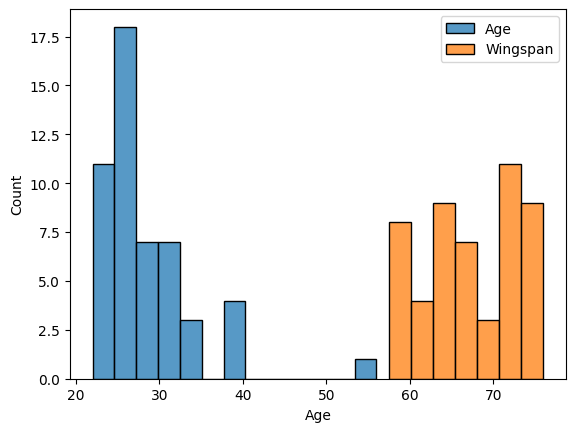

In [20]:
# Plot histogram of both the Age and the Wingspan:
sns.histplot(df['Age'], label='Age')
sns.histplot(df['Wingspan'], label='Wingspan')
plt.legend()
plt.show()

# Histograms plotted by groups
While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a histograms of one quantitative variable grouped by another categorical variables.

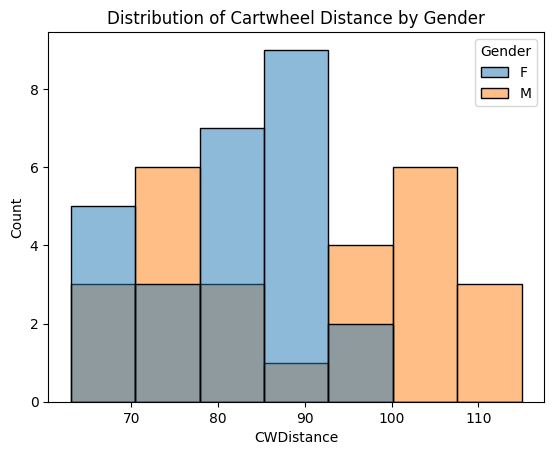

In [21]:
sns.histplot(data=df, x='CWDistance', hue='Gender')
plt.title('Distribution of Cartwheel Distance by Gender')
plt.show()

# Boxplots
Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

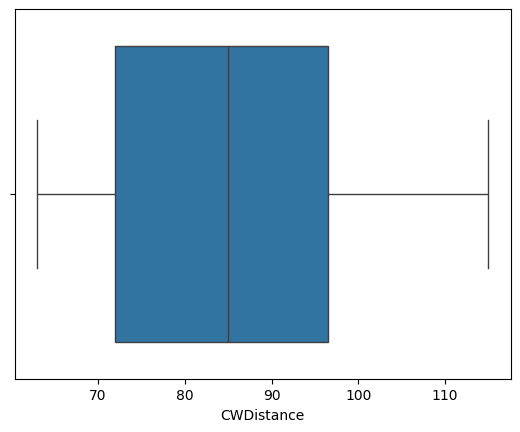

In [22]:
# Create the boxplot of the "CWDistance":
sns.boxplot(x=df['CWDistance'])
plt.show()

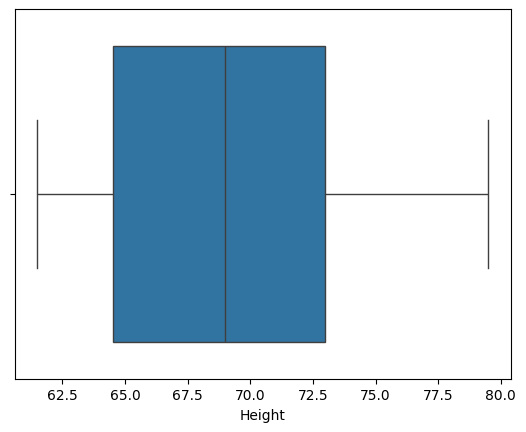

In [23]:
# Create the boxplot of the "Height":
sns.boxplot(x=df['Height'])
plt.show()

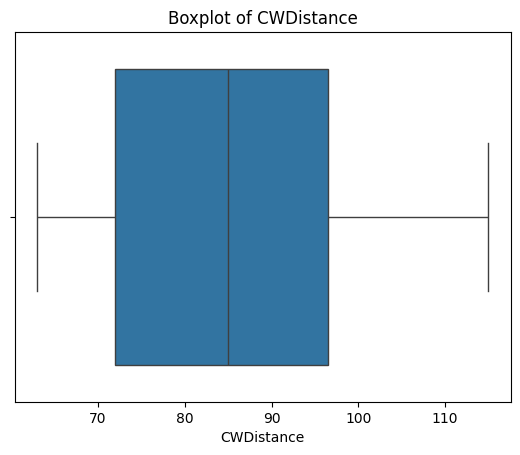

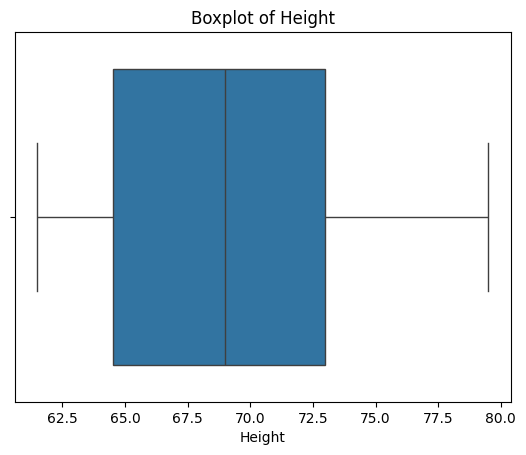

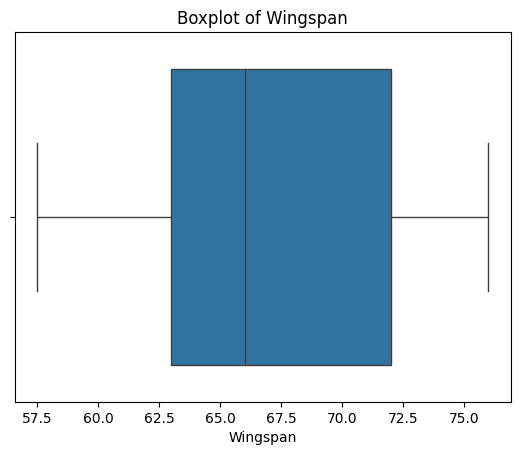

In [25]:
# Create the boxplots of the "CWDistance", "Height" and "Wingspan":
for column in ['CWDistance', 'Height', 'Wingspan']:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

#Boxplots plotted by groups
While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a side-by-side boxplots of one quantitative variable grouped by another categorical variables.

<Axes: ylabel='CWDistance'>

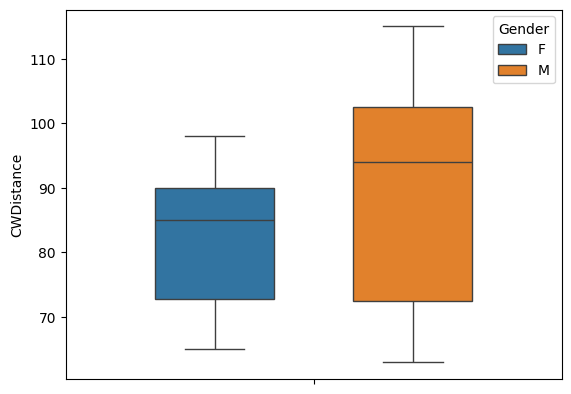

In [26]:
# Create side-by-side boxplots of the "CWDistance" grouped by "Gender"
sns.boxplot(data=df, y='CWDistance', hue='Gender', gap=.4)

<Axes: xlabel='Glasses', ylabel='Height'>

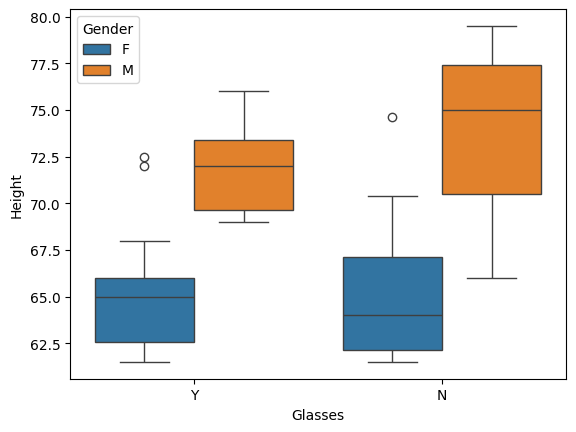

In [27]:
# Create side-by-side boxplots of the "Glasses" grouped by "Gender"
sns.boxplot(data=df, x="Glasses", y="Height", hue="Gender")

#Histograms and boxplots plotted by groups
We can also create both boxplots and histograms of one quantitative variable grouped by another categorical variables

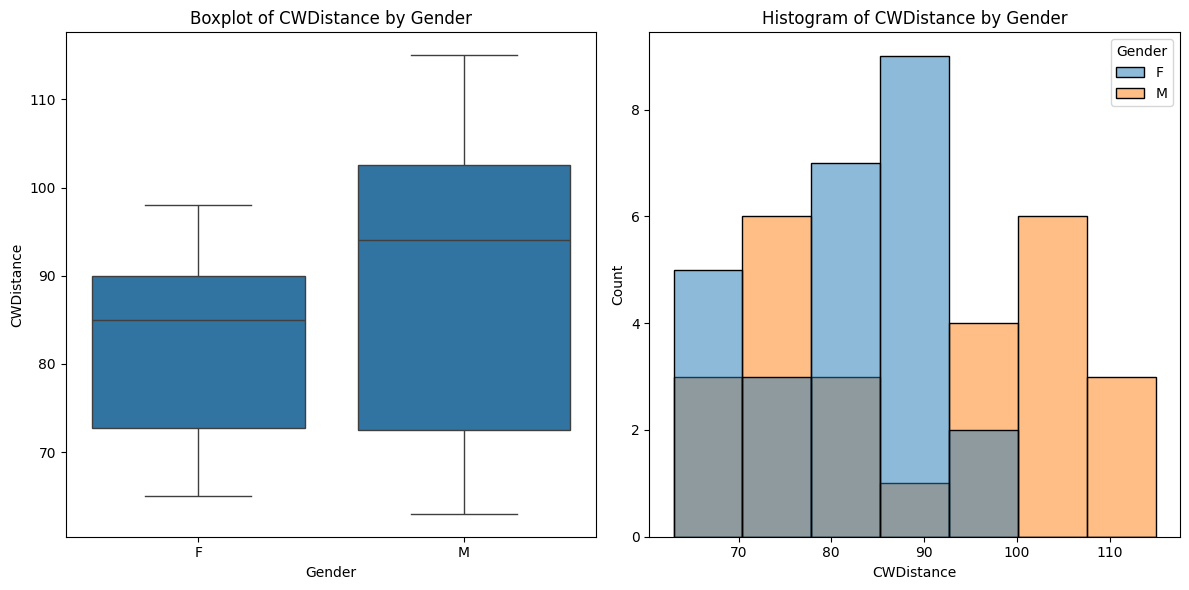

In [31]:
# Create a boxplot and histogram of the "tips" grouped by "Gender":
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot on the left subplot
sns.boxplot(data=df, x="Gender", y="CWDistance", ax=axes[0])
axes[0].set_title('Boxplot of CWDistance by Gender')

# Histogram on the right subplot
sns.histplot(data=df, x="CWDistance", hue="Gender", ax=axes[1])
axes[1].set_title('Histogram of CWDistance by Gender')

plt.show()

#Scatter plot
Plot values of one variable versus another variable to see how they are correlated

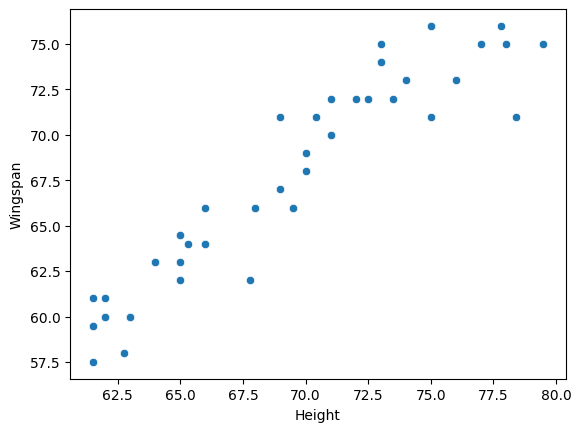

In [32]:
# scatter plot between two variables:
sns.scatterplot(data=df, x='Height', y='Wingspan')
plt.show()

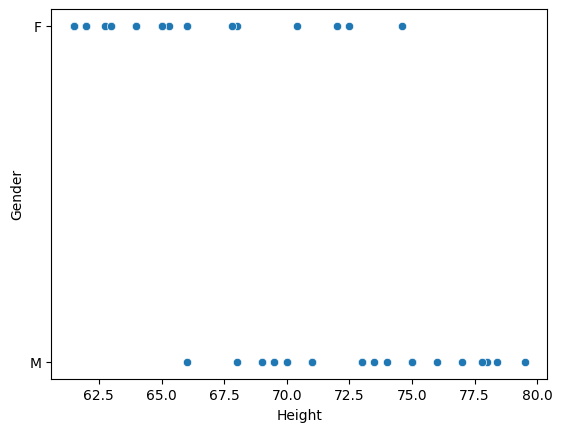

In [34]:
# scatter plot between two variables (one categorical):
sns.scatterplot(data=df, x='Height', y='Gender')
plt.show()

<Axes: xlabel='Height', ylabel='Wingspan'>

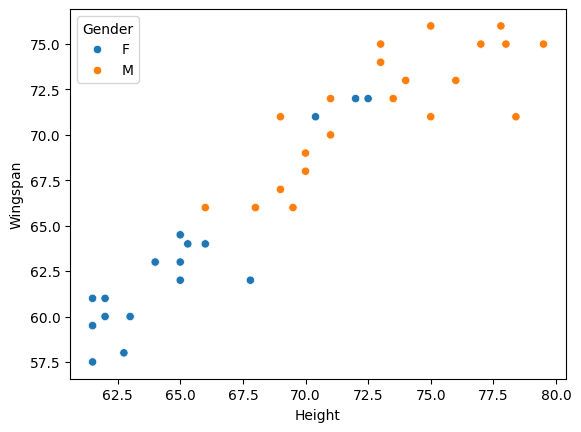

In [35]:
# scatter plot between two variables grouped according to a categorical variable
sns.scatterplot(data=df, x='Height', y='Wingspan', hue='Gender')

<Axes: xlabel='Height', ylabel='Wingspan'>

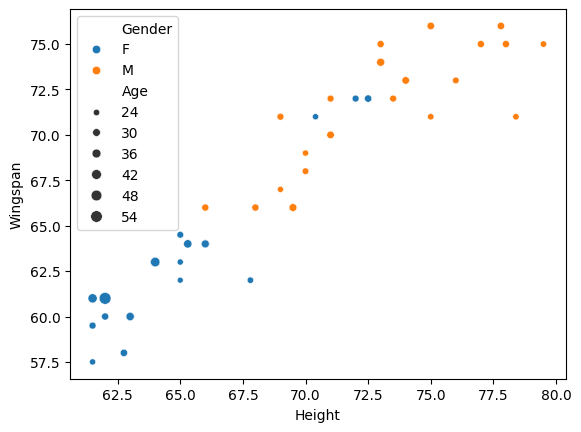

In [36]:
# scatter plot between two variables grouped according to a categorical variable and with size of markers:
sns.scatterplot(data=df, x='Height', y='Wingspan', hue='Gender', size='Age')

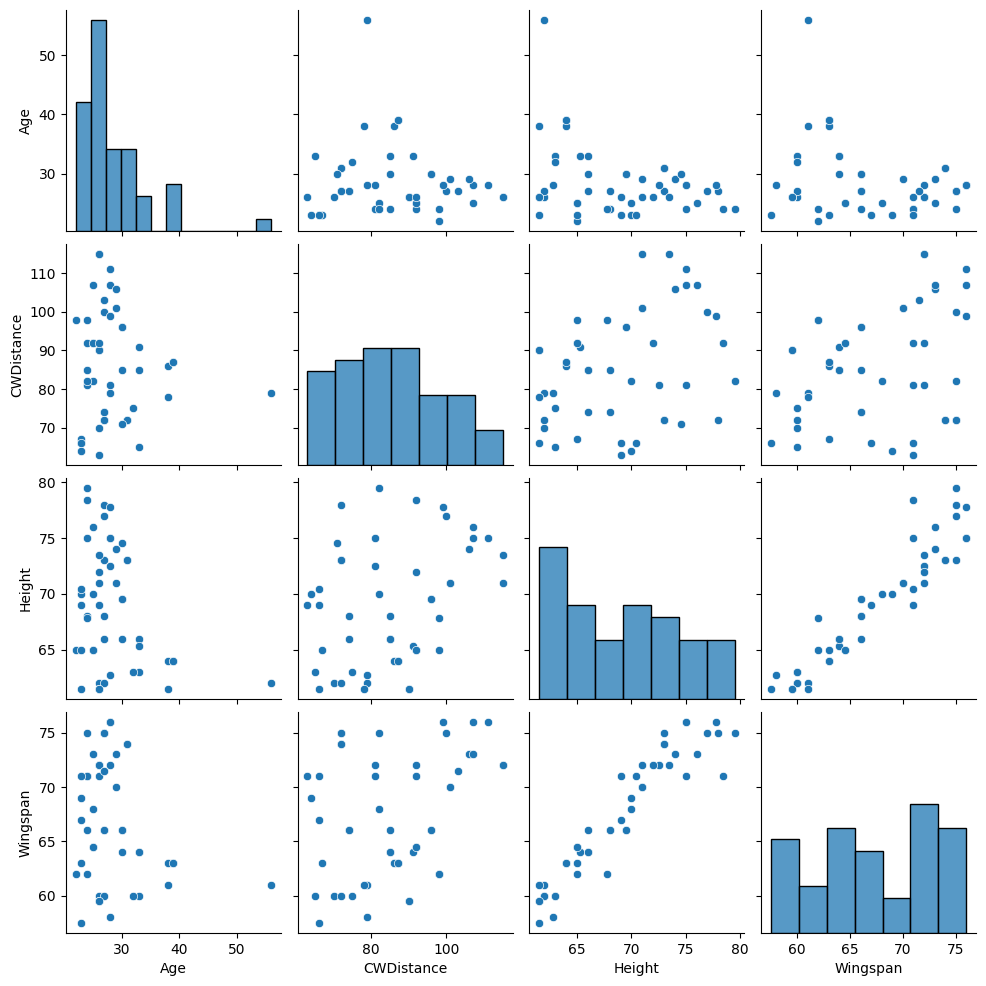

In [37]:
# Pairplot: Scatterplot of "Age","CWDistance","Height",'Wingspan':
sns.pairplot(df[['Age','CWDistance','Height','Wingspan']])
plt.show()

# Activity: work with the iris dataset
Repeat this tutorial with the iris data set and respond to the following inquiries

Plot the histograms for each of the four quantitative variables

Plot the histograms for each of the quantitative variables

Plot the boxplots for each of the quantitative variables

Plot the boxplots of the petal width grouped by type of flower

Plot the boxplots of the setal length grouped by type of flower

Provide a description (explaination from your observations) of each of the quantitative variables

# Importing libraries

In [ ]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# Importing data

In [ ]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [ ]:
# Print dataset
dataset.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Print dataset shape
print(dataset.shape)


(150, 5)


In [ ]:
# Print column names
dataset.columns


Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')

2. Drop rows with any missing values


In [ ]:
# Drop na
dataset = dataset .dropna()

print(dataset.shape)


(150, 5)


3. Encoding the class label categorical column: from string to num


In [ ]:
# Encoding the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
dataset

<ipython-input-7-6cf562935661>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now the label/category is numeric


4. Discard columns that won't be used


In [ ]:
# # Drop out non necesary columns
# dataset.drop(['Sepal_Length', 'Sepal_Width'],axis='columns',inplace=True)
#
# #Visualize the dataset
# dataset


5. Scatter plot of the data

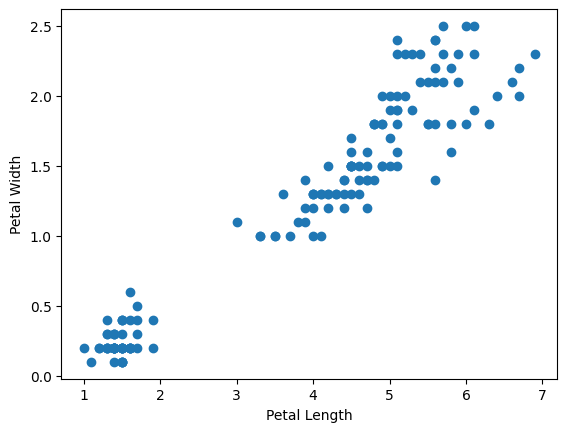

In [ ]:
# Scatter plot of Petal_Length vs Petal_Width
plt.scatter(dataset.Petal_Length,dataset.Petal_Width)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


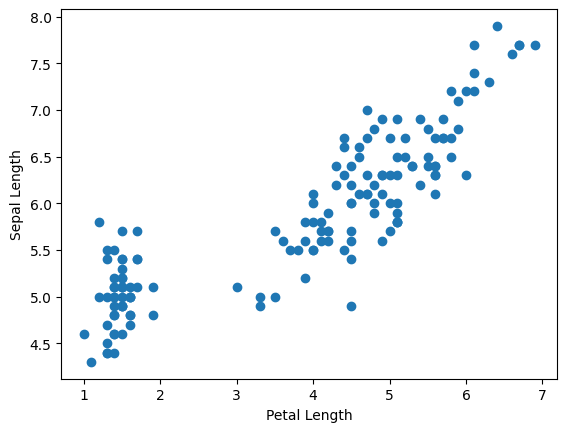

In [ ]:
# Scatter plot of Petal_Length vs Sepal_Length
plt.scatter(dataset.Petal_Length,dataset.Sepal_Length)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.show()


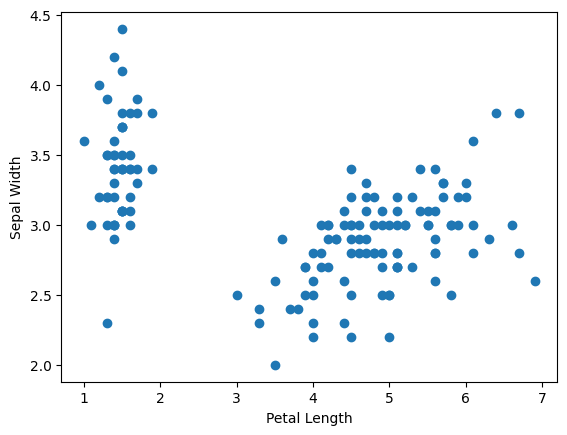

In [ ]:
# Scatter plot of Petal_Length vs Sepal_Width
plt.scatter(dataset.Petal_Length,dataset.Sepal_Width)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.show()


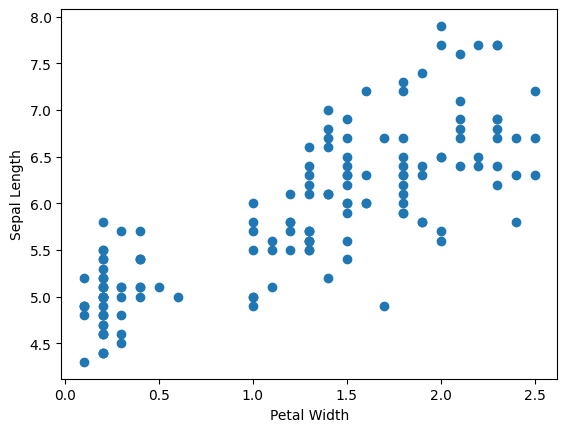

In [ ]:
# Scatter plot of Petal_Width vs Sepal_Length
plt.scatter(dataset.Petal_Width,dataset.Sepal_Length)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()


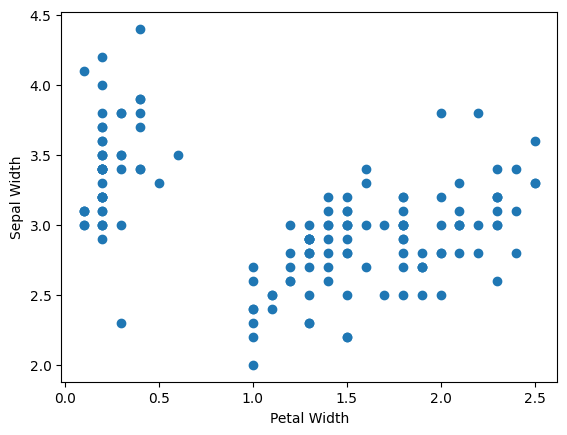

In [ ]:
# Scatter plot of Petal_Width vs Sepal_Width
plt.scatter(dataset.Petal_Width,dataset.Sepal_Width)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.show()


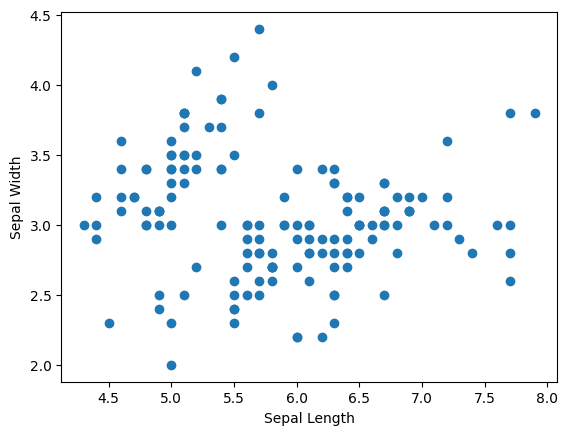

In [ ]:
# Scatter plot of Sepal_Length vs Sepal_Width
plt.scatter(dataset.Sepal_Length,dataset.Sepal_Width)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


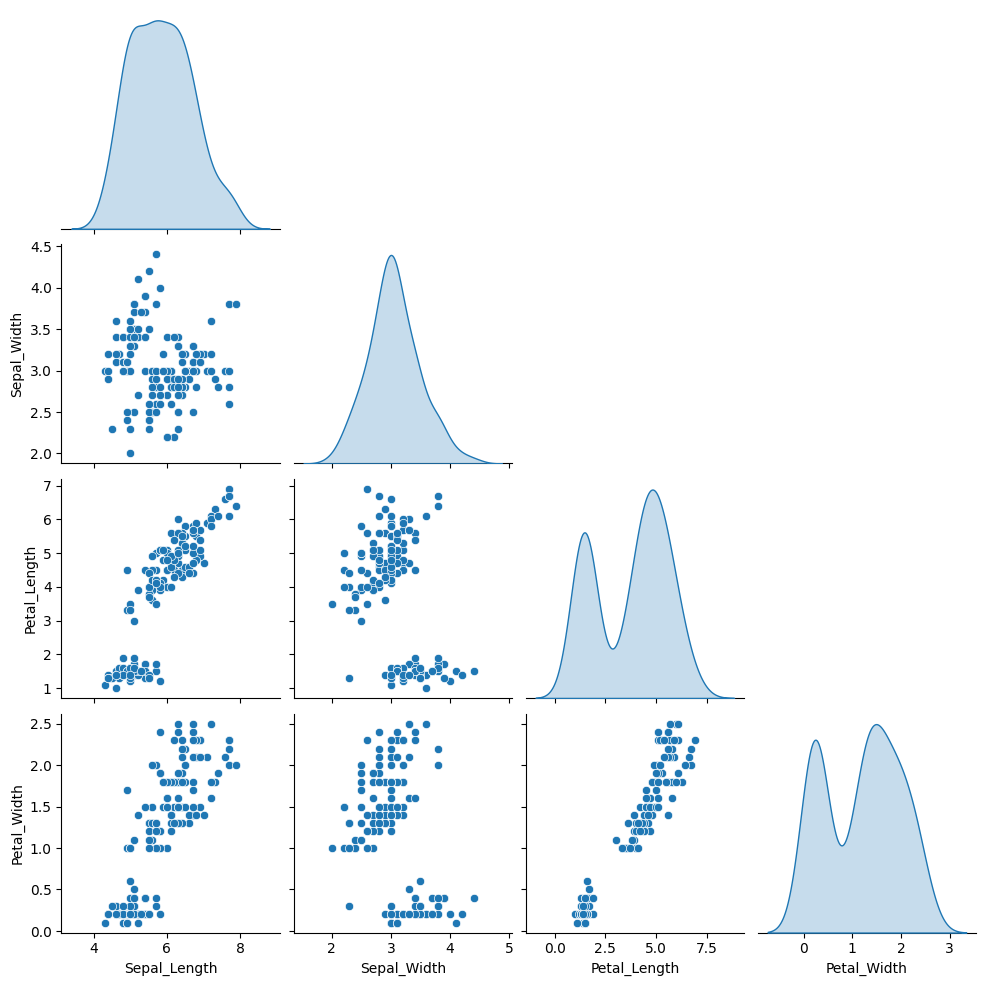

In [ ]:
# Pairplot: Scatterplot of all variables (not the flower type)
g = sns.pairplot(dataset[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']], corner=True, diag_kind="kde")
#g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()


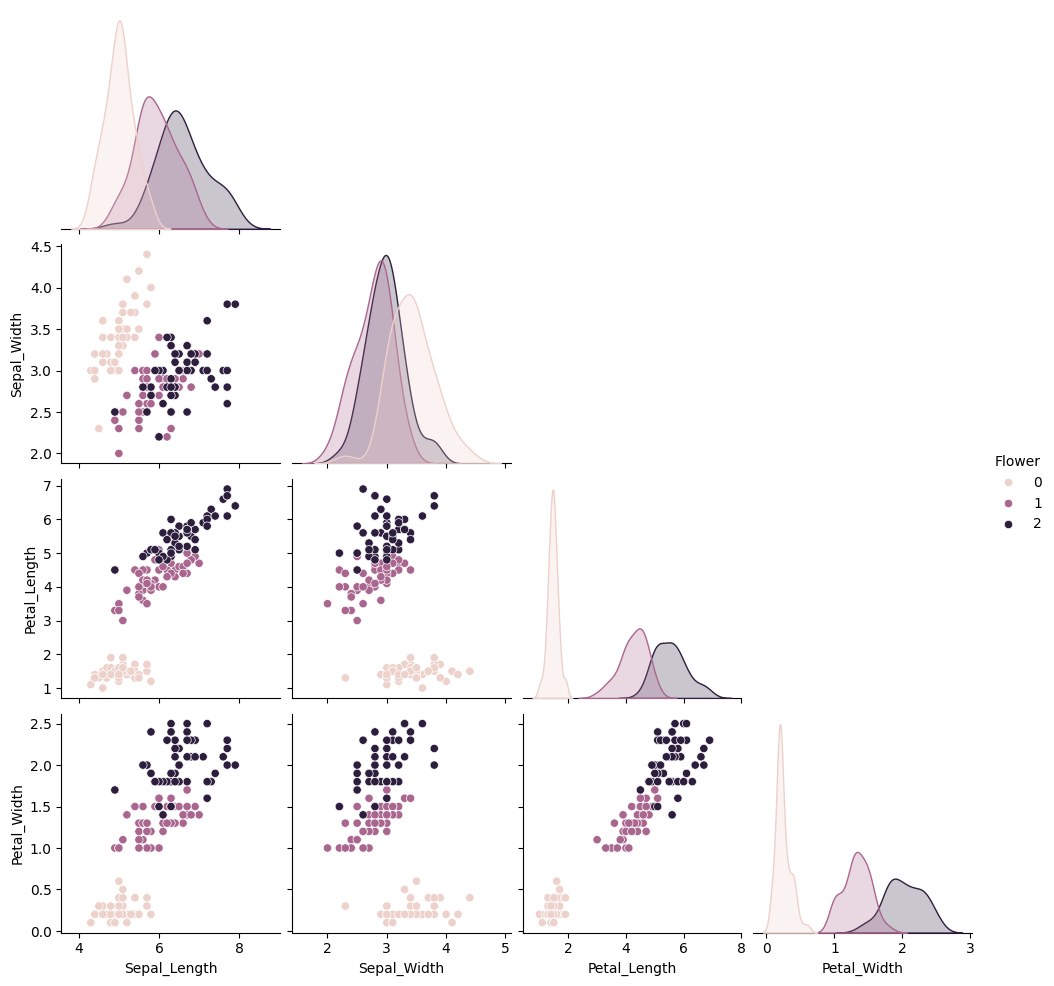

In [ ]:
# Pairplot: Scatterplot of all variables (not the flower type)
g = sns.pairplot(dataset, corner=True, diag_kind="kde", hue='Flower')
#g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()
